In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [44]:
from sklearn.metrics.pairwise import sigmoid_kernel

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [2]:
import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ratings_path = '/Users/shunfanhan/Desktop/week6/Anime/animelist.csv'
data_path = '/Users/shunfanhan/Desktop/week6/Anime/anime.csv'

In [4]:
anime_ratings = pd.read_csv(ratings_path)
anime_data = pd.read_csv(data_path)

In [5]:
anime_ratings.head(5)

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


In [6]:
anime_data.head(5)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [7]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [8]:
anime_data = anime_data[['MAL_ID', 'Name', 'Score', 'Genres', 'Type', 'Episodes', 'Members']]

In [9]:
anime_data.head(5)

,MAL_ID,Name,Score,Genres,Type,Episodes,Members
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,1251960
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,273145
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,558913
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,94683
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52,13224


In [10]:
anime_data.rename(columns={'MAL_ID':"anime_id"},inplace=True)

In [11]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   anime_id  17562 non-null  int64 
 1   Name      17562 non-null  object
 2   Score     17562 non-null  object
 3   Genres    17562 non-null  object
 4   Type      17562 non-null  object
 5   Episodes  17562 non-null  object
 6   Members   17562 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 960.5+ KB


In [12]:
anime_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109224747 entries, 0 to 109224746
Data columns (total 5 columns):
 #   Column            Dtype
---  ------            -----
 0   user_id           int64
 1   anime_id          int64
 2   rating            int64
 3   watching_status   int64
 4   watched_episodes  int64
dtypes: int64(5)
memory usage: 4.1 GB


In [13]:
anime_ratings.drop(anime_ratings.iloc[:,3:],axis=1,inplace=True)

In [14]:
anime_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109224747 entries, 0 to 109224746
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 2.4 GB


In [15]:
anime_ratings.anime_id.nunique()

17562

In [16]:
anime_ratings = anime_ratings.sample(frac=0.2)
anime_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21844949 entries, 48802793 to 36599512
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 666.7 MB


In [17]:
anime_ratings.anime_id.nunique()

17553

In [18]:
anime_complete = pd.merge(anime_data,anime_ratings,on='anime_id')
anime_complete=anime_complete.rename(columns={'rating':'user_rating','Score':'total_rating','Name':'anime_title'})
anime_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21844949 entries, 0 to 21844948
Data columns (total 9 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   anime_id      int64 
 1   anime_title   object
 2   total_rating  object
 3   Genres        object
 4   Type          object
 5   Episodes      object
 6   Members       int64 
 7   user_id       int64 
 8   user_rating   int64 
dtypes: int64(4), object(5)
memory usage: 1.6+ GB


In [19]:
anime_complete.isna().sum()

anime_id        0
anime_title     0
total_rating    0
Genres          0
Type            0
Episodes        0
Members         0
user_id         0
user_rating     0
dtype: int64

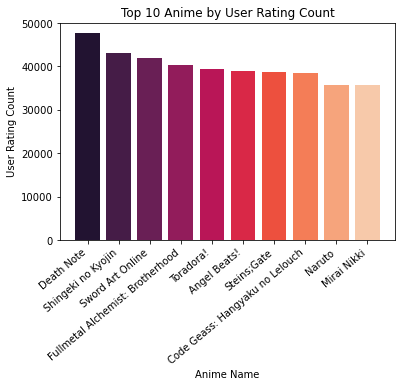

In [20]:
# Count the number of occurrences of each anime name
top_10_anime = anime_complete['anime_title'].value_counts().nlargest(10)
palette = sns.color_palette('rocket', len(top_10_anime))
# Create the bar chart
plt.bar(top_10_anime.index, top_10_anime.values, color=palette)

# Set the title and labels
plt.title('Top 10 Anime by User Rating Count')
plt.xlabel('Anime Name')
plt.ylabel('User Rating Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=40, ha="right")

# Show the plot
plt.show()

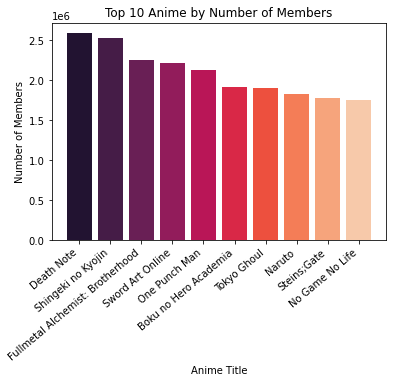

In [21]:
top_10_anime = anime_complete.sort_values(by='Members', ascending=False).drop_duplicates(subset='anime_title').head(10)

palette = sns.color_palette('rocket', len(top_10_anime))


# Create a bar chart with the anime titles and the number of members
plt.bar(top_10_anime['anime_title'], top_10_anime['Members'],color=palette)

# Set the title and labels
plt.title('Top 10 Anime by Number of Members')
plt.xlabel('Anime Title')
plt.ylabel('Number of Members')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=40,ha='right')

# Show the plot
plt.show()

In [22]:
anime_features = anime_complete.copy()
anime_features.head()

,anime_id,anime_title,total_rating,Genres,Type,Episodes,Members,user_id,user_rating
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,1251960,37641,7
1,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,1251960,52051,0
2,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,1251960,48640,0
3,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,1251960,203830,7
4,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,1251960,111603,0


In [23]:
anime_features.isnull().sum()

anime_id        0
anime_title     0
total_rating    0
Genres          0
Type            0
Episodes        0
Members         0
user_id         0
user_rating     0
dtype: int64

In [24]:
user_id_counts = anime_features['user_id'].value_counts()
user_id_counts

20807     3586
283786    3556
281232    3528
147331    3521
140590    3513
          ... 
232535       1
111812       1
106420       1
204778       1
119964       1
Name: user_id, Length: 318765, dtype: int64

In [25]:
user_id_counts.describe()

count    318765.000000
mean         68.529948
std          85.746190
min           1.000000
25%          20.000000
50%          46.000000
75%          89.000000
max        3586.000000
Name: user_id, dtype: float64

In [26]:
# Keep only the rows for which the user_id appears at least 200 times
anime_features = anime_features[anime_features['user_id'].isin(user_id_counts[user_id_counts >= 100].index)]

In [27]:
anime_features.user_id.nunique()

67330

In [28]:
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

In [29]:
anime_features['anime_title'] = anime_features['anime_title'].apply(text_cleaning)

In [30]:
anime_pivot=anime_features.pivot_table(index='anime_title',columns='user_id',values='user_rating').fillna(0)
anime_pivot.head()

user_id,6,12,16,17,19,21,42,44,47,53,...,353342,353352,353353,353357,353365,353383,353385,353390,353395,353398
anime_title,,,,,,,,,,,,,,,,,,,,,
"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Bungaku Shoujo"" Memoire",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Bungaku Shoujo"" Movie",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
anime_data['Name'] = anime_data['Name'].apply(text_cleaning)

In [33]:
# Convert the pivot table to a sparse matrix format
anime_matrix = csr_matrix(anime_pivot.values)

# Create a NearestNeighbors model using cosine similarity and brute-force algorithm
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')

# Fit the model to the data (i.e., the sparse matrix)
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [34]:
anime_title = np.random.choice(anime_pivot.index)

In [35]:
print(f"Randomly selected anime title: {anime_title} \n")

Randomly selected anime title: Mozu no Nie 



In [36]:
query_index = anime_pivot.index.get_loc(anime_title)

In [37]:
distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)

In [38]:
print(f"Recommendations for {anime_pivot.index[query_index]}:\n")

Recommendations for Mozu no Nie:



In [39]:
# Iterate over the nearest neighbors and print their names and distances
for i, (distance, index) in enumerate(zip(distances.flatten()[1:], indices.flatten()[1:])):
    print(f"{i+1}: {anime_pivot.index[index]}, with distance of {distance}")

1: Shin Choubakumatsu Shounen Seiki Takamaru, with distance of 0.7326105444836966
2: Saraba Seishun, with distance of 0.751784158203363
3: Himitsukessha Taka no Tsume THE PLANETARIUM: Burabura! Black Hole no Nazo, with distance of 0.7593817856148812
4: Ttoli Janggun, with distance of 0.7593817856148812
5: Kitsutsuki: The Ten Hole Stories, with distance of 0.7613196819802187


In [40]:
def give_rec_knn(anime_title = np.random.choice(anime_pivot.index),anime_pivot=anime_pivot):

    # Print the selected anime title
    print(f"Randomly selected anime title: {anime_title} \n")

    # Find the row index of the selected anime title
    query_index = anime_pivot.index.get_loc(anime_title)

    # Use the fitted KNN model to find the 6 nearest neighbors to the selected row
    distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)

    # Print the recommendations for the selected row
    print(f"Recommendations for {anime_pivot.index[query_index]}:\n")

    # Iterate over the nearest neighbors and print their names and distances
    for i, (distance, index) in enumerate(zip(distances.flatten()[1:], indices.flatten()[1:])):
        print(f"{i+1}: {anime_pivot.index[index]}, with distance of {distance}")

In [41]:
give_rec_knn("Steins;Gate")
give_rec_knn()

Randomly selected anime title: Steins;Gate 

Recommendations for Steins;Gate:

1: Angel Beats!, with distance of 0.8374367309243584
2: Shingeki no Kyojin, with distance of 0.8393405973239182
3: Bakemonogatari, with distance of 0.8407585929039794
4: Death Note, with distance of 0.8408141821344278
5: Steins;Gate: Oukoubakko no Poriomania, with distance of 0.8441643996193915
Randomly selected anime title: Bremen no Muppet Musician 

Recommendations for Bremen no Muppet Musician:

1: Tofu, with distance of 0.26825785796288226
2: Ha Ji Me Te, with distance of 0.2754715928352074
3: Hiromi, with distance of 0.2899761285961583
4: Cobalt Memories, with distance of 0.30407729768748315
5: I'm Here, with distance of 0.31365028051210253


In [43]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Fill NaN values in the 'Genres' column with an empty string
anime_data['Genres'] = anime_data['Genres'].fillna('')

# Split the 'Genres' column by comma and convert to string format
genres_str = anime_data['Genres'].str.split(',').astype(str)

# Use the TfidfVectorizer to transform the genres_str into a sparse matrix
tfv_matrix = tfv.fit_transform(genres_str)

# Print the shape of the sparse matrix
print(tfv_matrix.shape)

(17562, 2283)


In [45]:
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [46]:
# Create a Pandas Series object where the index is the anime names and the values are the indices in anime_data
indices = pd.Series(anime_data.index, index=anime_data['Name'])

# Remove duplicates in the index (i.e., duplicate anime names)
indices = indices.drop_duplicates()

In [47]:
def give_rec_cbf(title, sig=sig):
    # Get the index corresponding to anime title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the anime based on similarity scores
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of top 10 most similar anime excluding the input anime
    anime_indices = [i[0] for i in sig_scores[1:11]]

    # Create dataframe of top 10 recommended anime
    top_anime = pd.DataFrame({
        'Anime name': anime_data['Name'].iloc[anime_indices].values,
        'Rating': anime_data['Score'].iloc[anime_indices].values
    })

    return top_anime

In [48]:
give_rec_cbf('One Piece')

,Anime name,Rating
0,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,7.72
1,One Piece: Long Ring Long Land-hen,6.74
2,One Piece: Episode of East Blue - Luffy to 4-n...,7.91
3,One Piece: Episode of Sorajima,7.11
4,Shingeki no Kyojin OVA,7.83
5,Shingeki no Kyojin Movie 2: Jiyuu no Tsubasa,7.74
6,R.O.D: The TV,7.55
7,Zetsubou Funsai Shoujo ∞ Amida,6.55
8,One Piece Movie 1,7.1
9,One Piece Movie 2: Nejimaki-jima no Daibouken,7.17
